*Imports*

In [29]:
import numpy as np
import matplotlib.pyplot as plt

Generate Train Data and Labels

In [30]:
np.random.seed(42)
X = np.random.uniform(-3, 3, (1000, 1))  # 1000 Input data in range (-3, 3)
y = X ** 2

MLP Architecture + Initialize Weights and Biases

In [31]:
input_size = 1
hidden_size = 10
output_size = 1

weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

Trainting the MLP

In [32]:
# Set hyperparameters
learning_rate = 0.01
epochs = 1500

# Training
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = np.maximum(0, hidden_layer_input)  # ReLU activation function
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_y = output_layer_input

    # Compute loss (mean squared error)
    loss = np.mean((predicted_y - y)**2)

    # Gradient of the loss with respect to the predicted output
    grad_output = 2 * (predicted_y - y) / X.shape[0]

    # Gradient of the loss with respect to the weights and biases of the output layer
    grad_weights_hidden_output = np.dot(hidden_layer_output.T, grad_output)
    grad_bias_output = np.sum(grad_output, axis=0, keepdims=True)

    # Gradient of the loss with respect to the hidden layer output
    grad_hidden_output = np.dot(grad_output, weights_hidden_output.T)

    # Gradient of the loss with respect to the hidden layer input
    grad_hidden_input = grad_hidden_output * (hidden_layer_input > 0)

    # Gradient of the loss with respect to the weights and biases of the hidden layer
    grad_weights_input_hidden = np.dot(X.T, grad_hidden_input)
    grad_bias_hidden = np.sum(grad_hidden_input, axis=0, keepdims=True)

    # Update weights and biases using gradient descent
    weights_input_hidden -= learning_rate * grad_weights_input_hidden
    bias_hidden -= learning_rate * grad_bias_hidden
    weights_hidden_output -= learning_rate * grad_weights_hidden_output
    bias_output -= learning_rate * grad_bias_output

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 11.345666116782384
Epoch 100, Loss: 5.549304169339966
Epoch 200, Loss: 4.849138254867246
Epoch 300, Loss: 3.9944297648338756
Epoch 400, Loss: 2.4877397255886593
Epoch 500, Loss: 1.7284335500759704
Epoch 600, Loss: 1.292705317936548
Epoch 700, Loss: 1.0171361778177175
Epoch 800, Loss: 0.8236577288761623
Epoch 900, Loss: 0.6731008134266172
Epoch 1000, Loss: 0.5530062610231709
Epoch 1100, Loss: 0.4582811036802987
Epoch 1200, Loss: 0.3837469290668148
Epoch 1300, Loss: 0.32341310015454416
Epoch 1400, Loss: 0.27302756457560345


Testing

In [33]:
# Generate test data
X_test = np.random.uniform(-3, 3, (100, 1))
y_test = X_test ** 2

hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output_test = np.maximum(0, hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
predicted_y_test = output_layer_input_test

# Compute loss on the test data
test_loss = np.mean((predicted_y_test - y_test) ** 2)

print(f'Test Loss: {test_loss}')


Test Loss: 0.23061411488926256


Plot The True And Predicted Values

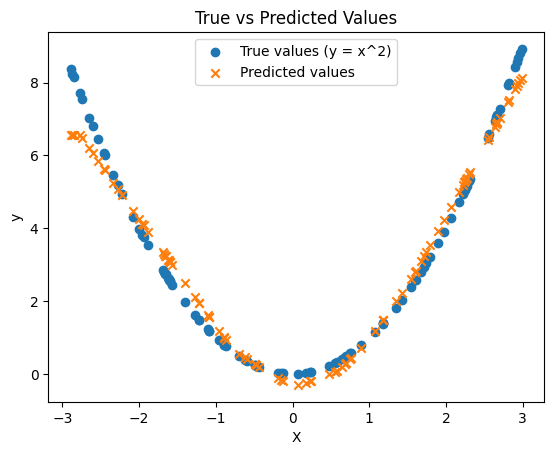

In [34]:
plt.scatter(X_test, y_test, label='True values (y = x^2)')
plt.scatter(X_test, predicted_y_test, label='Predicted values', marker='x')
plt.title('True vs Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()